## Import needed Python Libraries

In [1]:
import numpy as np
import pandas as pd

##  Let's read the data (using read_csv), and take a look at the first 5 lines using the head method:

In [2]:
data = pd.read_csv("chipotle.tsv", sep="\t" )
#data.columns = ["order", "quantity", "name", "choice", "price"]

In [3]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
data.sample(5)

,order_id,quantity,item_name,choice_description,item_price
712,293,1,Steak Burrito,"[[Roasted Chili Corn Salsa (Medium), Fresh Tom...",$11.48
1349,551,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl...",$8.75
3528,1418,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.25
1184,486,1,Chips and Guacamole,NaN,$4.45
3677,1472,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75


## Let’s have a look at data dimensionality, feature names, and feature types

In [5]:
print(data.shape)

(4622, 5)


In [6]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

## Now let's try printing out column names using columns

In [7]:
print(data.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


##  use the info() method to output some general information about the dataframe

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 126.4+ KB


In [9]:
data.item_name = data.item_name.astype('str')
data.item_name

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

## Statistical description of numerical variables

### The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types)

In [10]:
data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter

In [11]:
data.describe(include=['object', 'bool'])

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


## value_counts

In [12]:
data.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [13]:
data.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [14]:
data.item_name.value_counts(normalize=True)

Chicken Bowl                             0.157075
Chicken Burrito                          0.119645
Chips and Guacamole                      0.103635
Steak Burrito                            0.079619
Canned Soft Drink                        0.065123
Chips                                    0.045651
Steak Bowl                               0.045651
Bottled Water                            0.035050
Chicken Soft Tacos                       0.024881
Chicken Salad Bowl                       0.023799
Chips and Fresh Tomato Salsa             0.023799
Canned Soda                              0.022501
Side of Chips                            0.021852
Veggie Burrito                           0.020554
Barbacoa Burrito                         0.019688
Veggie Bowl                              0.018390
Carnitas Bowl                            0.014712
Barbacoa Bowl                            0.014280
Carnitas Burrito                         0.012765
Steak Soft Tacos                         0.011900


## Sorting
### A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, can sort by choice_description (use ascending=False to sort in descending order)

In [15]:
data.sort_values(by='choice_description', ascending=True).head()

,order_id,quantity,item_name,choice_description,item_price
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",$7.40
675,279,1,Burrito,"[Adobo-Marinated and Grilled Chicken, [Sour Cr...",$7.40
521,217,1,Crispy Tacos,[Adobo-Marinated and Grilled Chicken],$7.40
673,279,1,Bowl,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",$7.40
520,217,1,Crispy Tacos,[Adobo-Marinated and Grilled Steak],$7.40


## sort by multiple columns

In [16]:
data.sort_values(by=['item_name', 'choice_description'],
        ascending=[True, False]).head()

,order_id,quantity,item_name,choice_description,item_price
298,129,1,6 Pack Soft Drink,[Sprite],$6.49
1026,422,1,6 Pack Soft Drink,[Sprite],$6.49
1279,520,1,6 Pack Soft Drink,[Sprite],$6.49
2374,945,1,6 Pack Soft Drink,[Sprite],$6.49
3806,1525,1,6 Pack Soft Drink,[Sprite],$6.49


## Indexing and retrieving data

### A DataFrame can be indexed in a few different ways.To get a single column, you can use a DataFrame['Name'] construction.

In [17]:
data.mean()

order_id    927.254868
quantity      1.075725
dtype: float64

### Boolean indexing with one column is also very convenient. The syntax is data[P(data['Name'])], where P is some logical condition that is checked for each element of the Name column. The result of such indexing is the DataFrame consisting only of rows that satisfy the P condition on the Name column.

In [18]:
data[data == 3].mean()

order_id              3.0
quantity              3.0
item_name             NaN
choice_description    NaN
item_price            NaN
dtype: float64

In [19]:
data[data == 5]['choice_description'].mean()

nan

In [20]:
data["item_name"]

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

## DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for indexing by name, while iloc() is used for indexing by number.

In [21]:
data.loc[ 3, ["item_name","quantity", "order_id"] ]

item_name    Chips and Tomatillo-Green Chili Salsa
quantity                                         1
order_id                                         1
Name: 3, dtype: object

In [22]:
data.loc[ 3 , ["item_name","item_price"] ]

item_name     Chips and Tomatillo-Green Chili Salsa
item_price                                   $2.39 
Name: 3, dtype: object

In [23]:
data.iloc[5,3]

'[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]'

In [24]:
data[-1:]

,order_id,quantity,item_name,choice_description,item_price
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [26]:
small_data = data[40:100]
small_data

,order_id,quantity,item_name,choice_description,item_price
40,19,1,Chips,NaN,$2.15
41,20,1,Chips and Guacamole,NaN,$4.45
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$11.25
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",$11.75
44,20,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75
45,21,1,Chicken Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$10.98
46,21,1,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajit...",$8.99
47,21,1,Izze,[Blackberry],$3.39
48,22,1,Steak Burrito,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",$8.99
49,22,1,Chips and Guacamole,NaN,$3.99


In [27]:
data.at[ 3 , "item_name" ] = "Chips and Tomatillo-Green"

## Print all items in the menu

In [28]:
menu_items = []

for i in data["item_name"]:
    
    if i not in menu_items:
        
        menu_items.append(i)
        
print( len(menu_items) )

51


## Total number of times items order

In [29]:
menu_items = data.item_name.unique()

for item_name in menu_items:
    
    data_of_item_name = data[ data.item_name == item_name ]
    print(item_name, " : ", data_of_item_name.shape[0] )

Chips and Fresh Tomato Salsa  :  110
Izze  :  20
Nantucket Nectar  :  27
Chips and Tomatillo-Green  :  1
Chicken Bowl  :  726
Side of Chips  :  101
Steak Burrito  :  368
Steak Soft Tacos  :  55
Chips and Guacamole  :  479
Chicken Crispy Tacos  :  47
Chicken Soft Tacos  :  115
Chips and Tomatillo-Green Chili Salsa  :  30
Chicken Burrito  :  553
Canned Soda  :  104
Barbacoa Burrito  :  91
Carnitas Burrito  :  59
Carnitas Bowl  :  68
Bottled Water  :  162
Chips and Tomatillo Green Chili Salsa  :  43
Barbacoa Bowl  :  66
Chips  :  211
Chicken Salad Bowl  :  110
Steak Bowl  :  211
Barbacoa Soft Tacos  :  25
Veggie Burrito  :  95
Veggie Bowl  :  85
Steak Crispy Tacos  :  35
Chips and Tomatillo Red Chili Salsa  :  48
Barbacoa Crispy Tacos  :  11
Veggie Salad Bowl  :  18
Chips and Roasted Chili-Corn Salsa  :  18
Chips and Roasted Chili Corn Salsa  :  22
Carnitas Soft Tacos  :  40
Chicken Salad  :  9
Canned Soft Drink  :  301
Steak Salad Bowl  :  29
6 Pack Soft Drink  :  54
Chips and Tomatillo-

In [30]:
data.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green', 'Chicken Bowl', 'Side of Chips',
       'Steak Burrito', 'Steak Soft Tacos', 'Chips and Guacamole',
       'Chicken Crispy Tacos', 'Chicken Soft Tacos',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Burrito',
       'Canned Soda', 'Barbacoa Burrito', 'Carnitas Burrito',
       'Carnitas Bowl', 'Bottled Water',
       'Chips and Tomatillo Green Chili Salsa', 'Barbacoa Bowl', 'Chips',
       'Chicken Salad Bowl', 'Steak Bowl', 'Barbacoa Soft Tacos',
       'Veggie Burrito', 'Veggie Bowl', 'Steak Crispy Tacos',
       'Chips and Tomatillo Red Chili Salsa', 'Barbacoa Crispy Tacos',
       'Veggie Salad Bowl', 'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy T

In [31]:
data.item_price.unique()

array(['$2.39 ', '$3.39 ', '$16.98 ', '$10.98 ', '$1.69 ', '$11.75 ',
       '$9.25 ', '$4.45 ', '$8.75 ', '$11.25 ', '$8.49 ', '$2.18 ',
       '$8.99 ', '$1.09 ', '$2.95 ', '$2.15 ', '$3.99 ', '$22.50 ',
       '$11.48 ', '$17.98 ', '$17.50 ', '$4.30 ', '$5.90 ', '$1.25 ',
       '$23.78 ', '$6.49 ', '$11.08 ', '$1.50 ', '$22.16 ', '$32.94 ',
       '$22.20 ', '$10.58 ', '$2.50 ', '$23.50 ', '$7.40 ', '$18.50 ',
       '$3.00 ', '$6.78 ', '$11.89 ', '$9.39 ', '$4.00 ', '$3.75 ',
       '$8.69 ', '$2.29 ', '$8.90 ', '$3.27 ', '$3.89 ', '$8.19 ',
       '$35.00 ', '$27.75 ', '$11.80 ', '$6.00 ', '$26.25 ', '$21.96 ',
       '$4.36 ', '$7.50 ', '$4.78 ', '$13.35 ', '$6.45 ', '$5.07 ',
       '$22.96 ', '$7.17 ', '$7.98 ', '$4.50 ', '$26.07 ', '$12.98 ',
       '$35.25 ', '$44.25 ', '$10.50 ', '$33.75 ', '$16.38 ', '$13.52 ',
       '$5.00 ', '$15.00 ', '$8.50 ', '$17.80 ', '$1.99 ', '$11.49 '],
      dtype=object)

In [32]:
data_with_Izze = data[ data.item_name == "Izze" ]
data_with_Izze.choice_description.unique().shape[0]

3

## Boxplot of numerical variables

In [33]:
import matplotlib.pyplot as plt

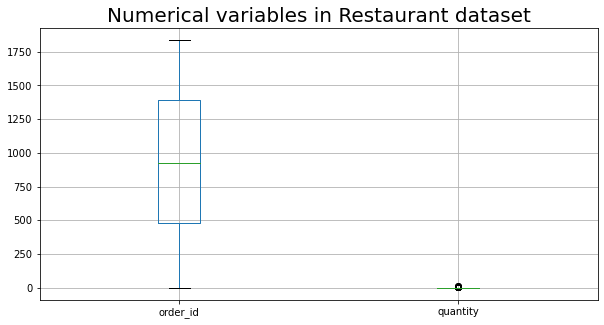

In [34]:
num_cols = ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']
plt.figure(figsize=(10,5))
data[num_cols].boxplot()
plt.title("Numerical variables in Restaurant dataset", fontsize=20)
plt.show()

## Joint distribution of order_id vs quantity

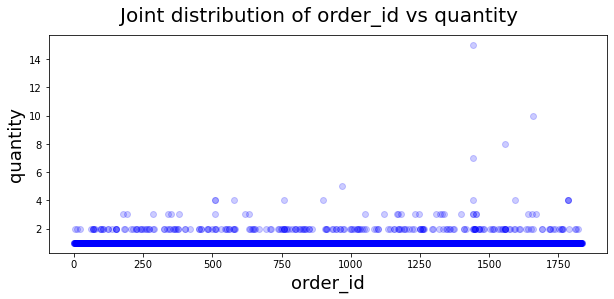

In [35]:
plt.figure(figsize=(10,4))
plt.xlabel("order_id", fontsize=18)
plt.ylabel("quantity", fontsize=18)
plt.suptitle("Joint distribution of order_id vs quantity", fontsize= 20)
plt.plot(data['order_id'], data['quantity'], 'bo', alpha=0.2)
plt.show()

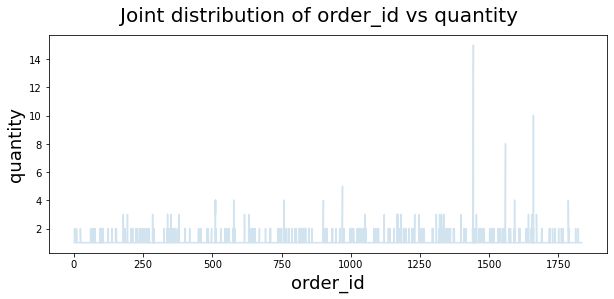

In [36]:
plt.figure(figsize=(10,4))
plt.xlabel("order_id", fontsize=18)
plt.ylabel("quantity", fontsize=18)
plt.suptitle("Joint distribution of order_id vs quantity", fontsize= 20)
plt.plot(data['order_id'], data['quantity'], alpha=0.2)
plt.show()

## Data Cleaning & Pre-processing

## Initial Distribution of features

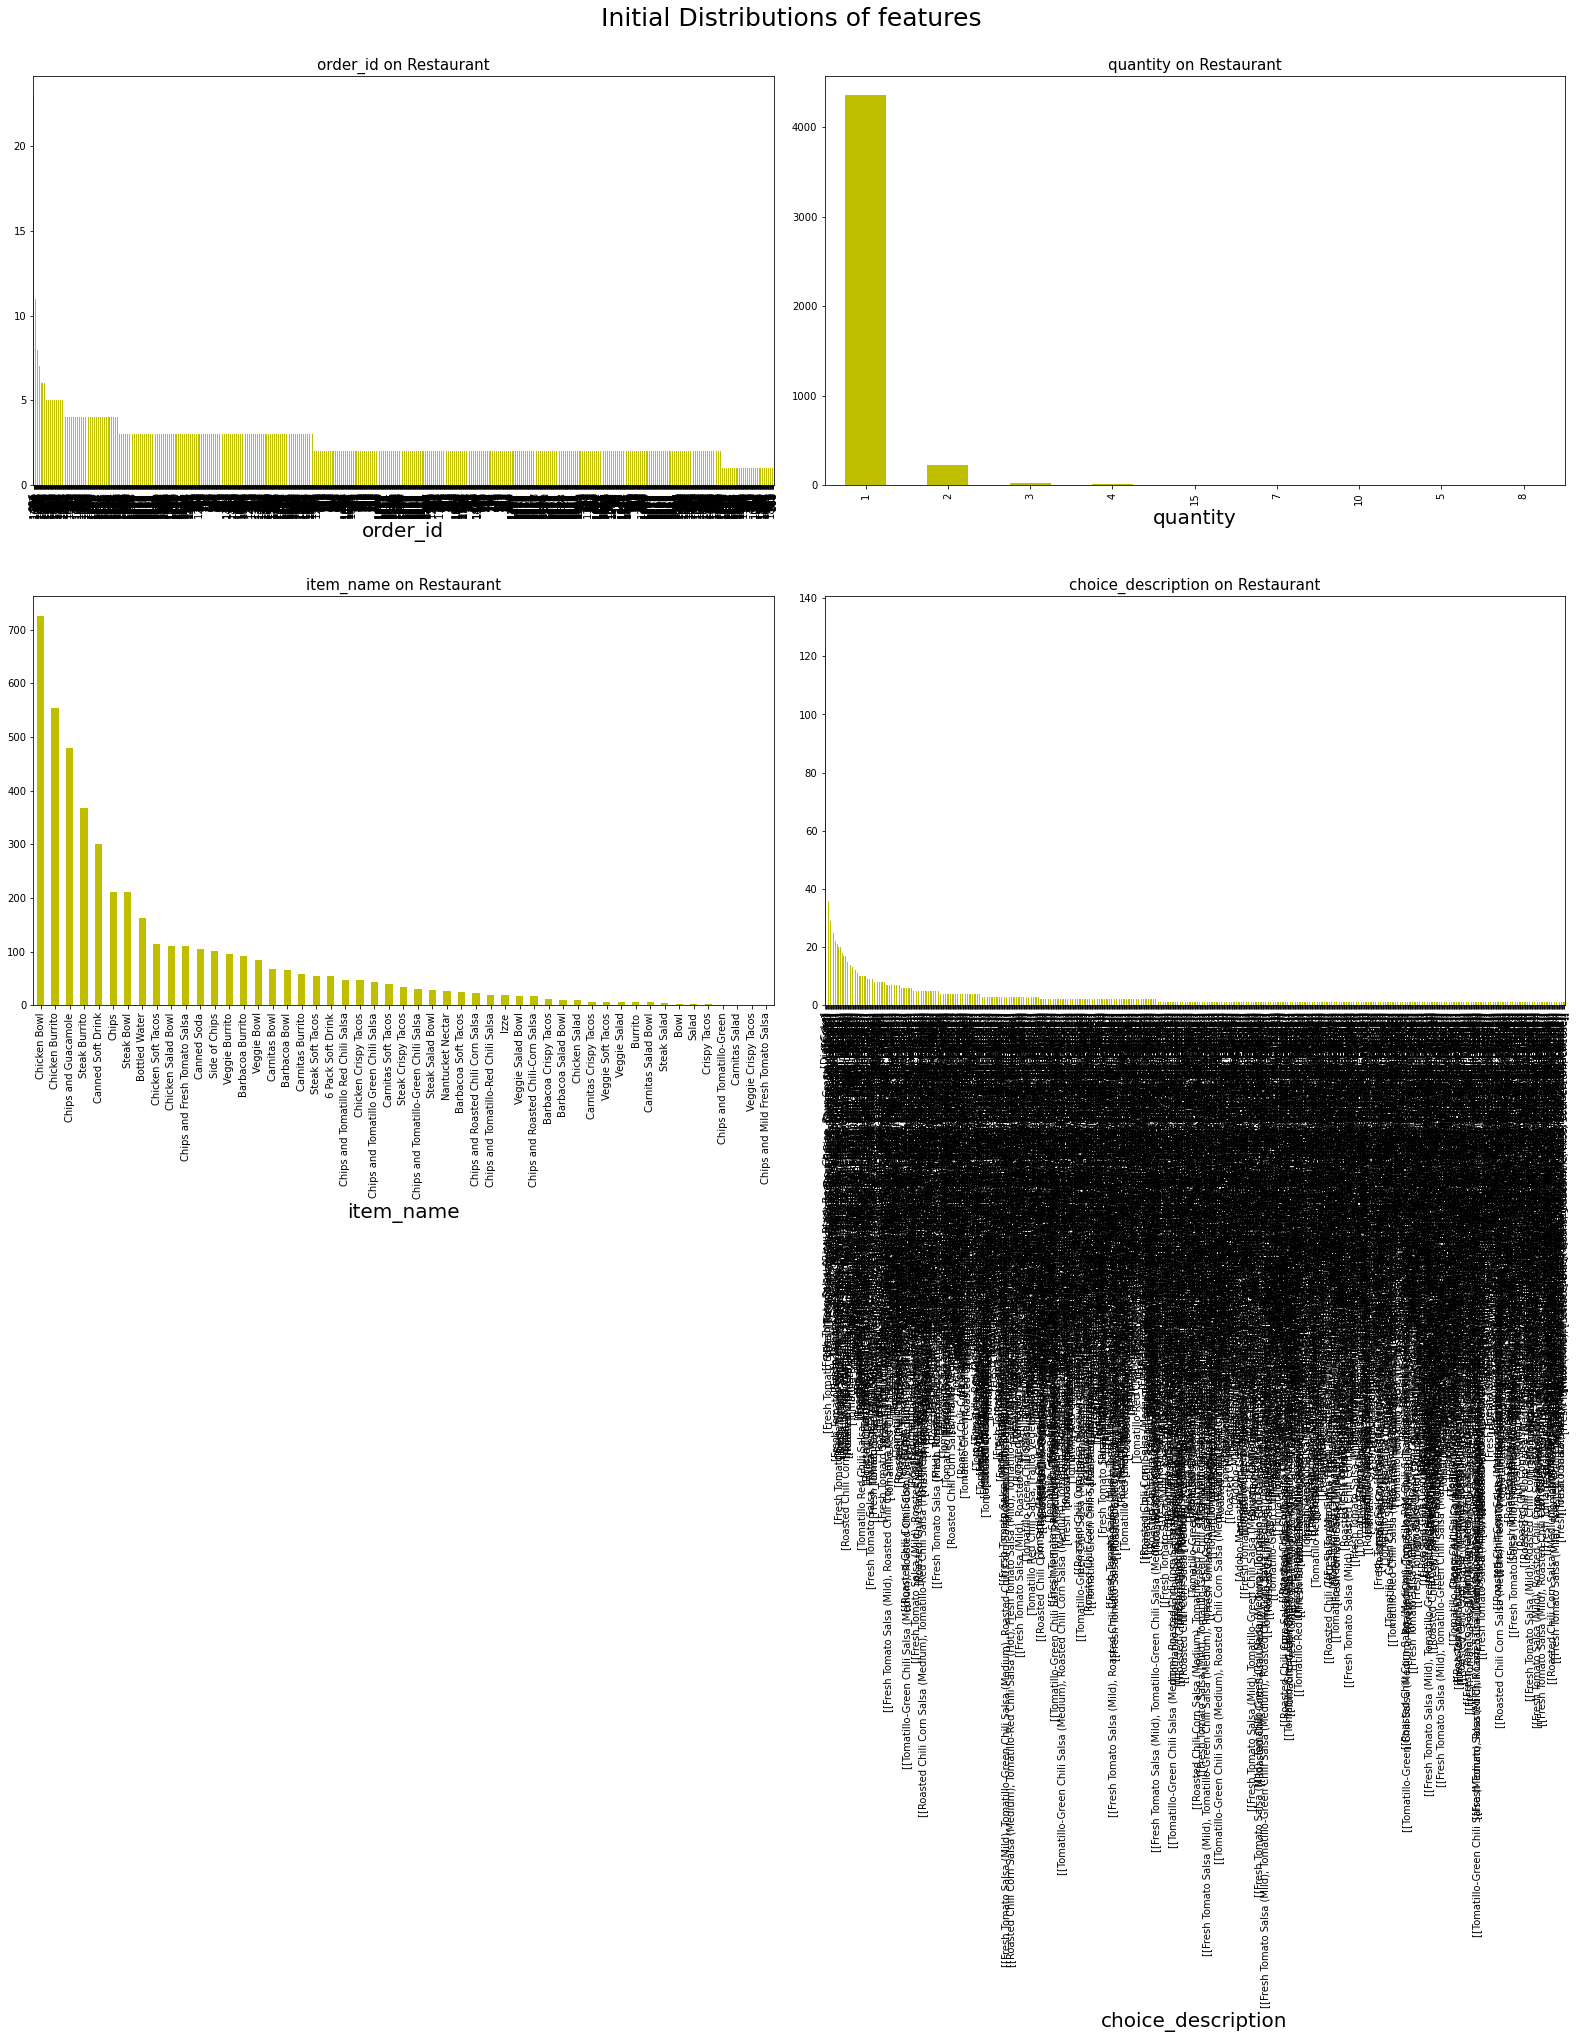

In [37]:
def plot_dist(col, ax):
    data[col][data[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Restaurant".format(col), fontsize= 15)
    return ax

f, ax = plt.subplots(2,2 , figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['order_id', 'quantity', 'item_name', 'choice_description']
k = 0
for i in range(2):
    for j in range(2):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

## Step-by-step features processing:

In [38]:
data.order_id = data.order_id.fillna('Unknown')
data.order_id = data.order_id.astype('category').cat.as_ordered()
data.at[37313,'quantity'] = '38'
data.quantity = data.quantity.fillna(0).astype(int)
data.choice_description = data.choice_description.astype('str')


In [39]:
data[data.isnull()].sample(5)

,order_id,quantity,item_name,choice_description,item_price
3384,NaN,NaN,NaN,NaN,NaN
837,NaN,NaN,NaN,NaN,NaN
4512,NaN,NaN,NaN,NaN,NaN
1706,NaN,NaN,NaN,NaN,NaN
597,NaN,NaN,NaN,NaN,NaN


## Total Number of Users vs Total Number of items bought

In [40]:
import seaborn as sns

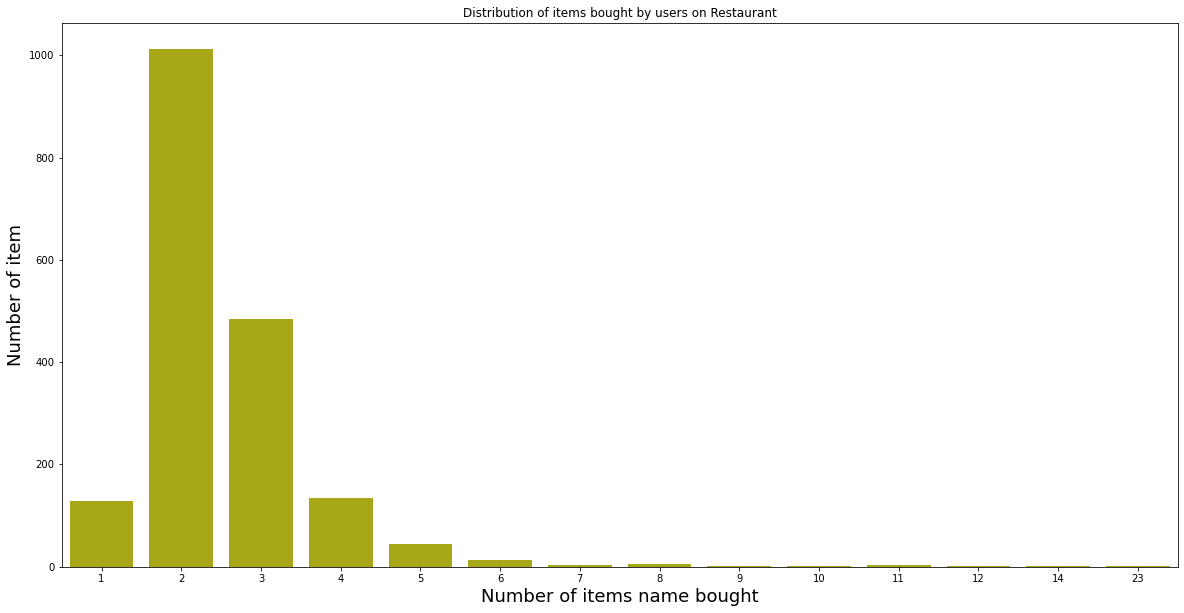

In [42]:
items_name_bought = []
total_users = []
for i in range(min(data.order_id.value_counts()), max(data.order_id.value_counts())+1):
    all_users = sum(data.order_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_name_bought.append(i)
plt.xlabel("Number of items name bought", fontsize = 18)
plt.ylabel("Number of item", fontsize = 18)
plt.title("Distribution of items bought by users on Restaurant")
__ = sns.barplot(x=items_name_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

In [43]:
price = ["$45", "$67.43", "$32.21"]

def converter(number):
    
    return float( number[1:] )

for i in range(3):
    
    price[i] = converter( price[i] )

price

[45.0, 67.43, 32.21]

In [47]:
data.sum()

order_id                                                        4285772
quantity                                                           5010
choice_description    nan[Clementine][Apple]nan[Tomatillo-Red Chili ...
dtype: object

In [48]:
data.item_price.describe()

count       4622
unique        78
top       $8.75 
freq         730
Name: item_price, dtype: object

In [49]:
data.min()

order_id                                                              1
quantity                                                              1
choice_description    [Adobo-Marinated and Grilled Chicken, Pinto Be...
dtype: object

In [50]:
data.max()

order_id              1834
quantity                38
choice_description     nan
dtype: object

In [51]:
help( data.item_price.apply )

Help on method apply in module pandas.core.series:

apply(func, convert_dtype=True, args=(), **kwds) method of pandas.core.series.Series instance
    Invoke function on values of Series.
    
    Can be ufunc (a NumPy function that applies to the entire Series)
    or a Python function that only works on single values.
    
    Parameters
    ----------
    func : function
        Python function or NumPy ufunc to apply.
    convert_dtype : bool, default True
        Try to find better dtype for elementwise function results. If
        False, leave as dtype=object.
    args : tuple
        Positional arguments passed to func after the series value.
    **kwds
        Additional keyword arguments passed to func.
    
    Returns
    -------
    Series or DataFrame
        If func returns a Series object the result will be a DataFrame.
    
    See Also
    --------
    Series.map: For element-wise operations.
    Series.agg: Only perform aggregating type operations.
    Series.transform